## Chankong and Haimes function 

Problem taken from \[Chankong, Vira; Haimes, Yacov Y. (1983). Multiobjective decision making. Theory and methodology. ISBN 0-444-00710-5.\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 2 + (x_1 - 2)^2 + (x_2 - 1)^2$

$f_2 (x_1,x_2) = 9 x_1 - (x_2 - 1)^2$

*subjected to*

$x_1^2 + x_2^2 \le 225$

$x_1 - 3 x_2 + 10 \ge 0.0$

*in the domain*

$-20 \le x_1,x_2 \le 20$

In [1]:
from mosa import Anneal
from time import time
%matplotlib inline

### Translates the Chankong and Haimes problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. The argument of the Python function is a dictionary with just one key, $X$, representing a temptative solution to the problem. The constraints are defined as $c_1$ and $c_2$. If they are not satisfied, an *ad hoc* dominated solution is defined, considering the Pareto front from a previous unconstrained run.

In [2]:
def fobj(solution):
    f1=2.0+pow((solution["X"][0]-2),2)+pow((solution["X"][1]-1),2)
    f2=9.0*solution["X"][0]-pow((solution["X"][1]-1),2)
    c1=pow(solution["X"][0],2)+pow(solution["X"][1],2)
    c2=solution["X"][0]-3.0*solution["X"][1]+10.0
    
    if c1>225.0 or c2>0.0:
        f1=1000.0
        f2=0.0
    
    return [f1,f2]

### Initialization

First, a population is defined. The population is a dictionary and its key $X$ is the same key that will be present in the temptative solutions to the problem. In the case of the Chankong and Haimes problem, we used only one key because both $x_1$ and $x_2$ above are restricted to the same domain. Since the solution space is continuous for $X$ in the domain defined above, $X$ is set to an empty dictionary.

Then, an Anneal object is created with initial definitions. Particularly important, the definitions related to the archive  used to store the best solutions (e.g., archive size) are set by the *setarchiveconfig* function.

In [3]:
population={"X":[]}
opt=Anneal()
opt.setpopulation(population)
opt.setarchiveconfig(archivesize=10000,maxarchivereject=100000)
opt.setalpha(0.0)

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
Developed by Dr. Roberto Gomes de Aguiar Veiga
Universidade Federal do ABC, Brazil


Setting population...
Done!
Setting archive configurations...
Done!
Setting alpha...
Done!


### Hot run

A first run starting at very high temperatures (1000) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

Please pay attention to the arguments of *settemp* and *setxconfig* functions. In *setxconfig*, *xnel["X"]* is equal to 2 because any solution of the Chankong and Haimes problem consists of two numbers, $x_1$ and $x_2$. The boundaries are defined by *xbounds["X"]*. 

In [4]:
opt.settemp(initemp=1000.0,decrease=0.95,niter=1000,ntemp=100)
opt.setxconfig(xnel={"X":2},
               xstep={"X":2.0},
               exchangeprob={"X":1.0},
               xbounds={"X":[-20.0,20.0]})
start=time()
opt.evolve(fobj)

Setting temperature...
Done!
Setting solution configurations...
Done!
--- BEGIN: Evolving a solution ---

Initializing archive...
Empty archive!
Done!
Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [-20.0000,20.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 2.000000
------
Initializing with a random solution from scratch...
Done!
------
TEMPERATURE: 1000.000000
    Number of accepted moves: 956.
    Fraction of accepted moves: 0.956000.
    Number of archive updates: 239.
    Fraction of archive updates in accepted moves: 0.250000.
------
TEM

    Number of accepted moves: 866.
    Fraction of accepted moves: 0.866000.
    Number of archive updates: 76.
    Fraction of archive updates in accepted moves: 0.087760.
------
TEMPERATURE: 135.275954
    Number of accepted moves: 839.
    Fraction of accepted moves: 0.839000.
    Number of archive updates: 20.
    Fraction of archive updates in accepted moves: 0.023838.
------
TEMPERATURE: 128.512157
    Number of accepted moves: 844.
    Fraction of accepted moves: 0.844000.
    Number of archive updates: 39.
    Fraction of archive updates in accepted moves: 0.046209.
------
TEMPERATURE: 122.086549
    Number of accepted moves: 843.
    Fraction of accepted moves: 0.843000.
    Number of archive updates: 52.
    Fraction of archive updates in accepted moves: 0.061684.
------
TEMPERATURE: 115.982221
    Number of accepted moves: 829.
    Fraction of accepted moves: 0.829000.
    Number of archive updates: 54.
    Fraction of archive updates in accepted moves: 0.065139.
------
TEMP

    Number of accepted moves: 591.
    Fraction of accepted moves: 0.591000.
    Number of archive updates: 26.
    Fraction of archive updates in accepted moves: 0.043993.
------
TEMPERATURE: 16.515374
    Number of accepted moves: 520.
    Fraction of accepted moves: 0.520000.
    Number of archive updates: 71.
    Fraction of archive updates in accepted moves: 0.136538.
------
TEMPERATURE: 15.689606
    Number of accepted moves: 539.
    Fraction of accepted moves: 0.539000.
    Number of archive updates: 43.
    Fraction of archive updates in accepted moves: 0.079777.
------
TEMPERATURE: 14.905125
    Number of accepted moves: 542.
    Fraction of accepted moves: 0.542000.
    Number of archive updates: 17.
    Fraction of archive updates in accepted moves: 0.031365.
------
TEMPERATURE: 14.159869
    Number of accepted moves: 489.
    Fraction of accepted moves: 0.489000.
    Number of archive updates: 47.
    Fraction of archive updates in accepted moves: 0.096115.
------
TEMPERAT

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front. Notice that in the *setxconfig* function the step size was also decreased.

Solutions produced by the "hot run" were taken from the archive.

In [5]:
opt.settemp(initemp=1.0,decrease=0.95,niter=1000,ntemp=100)
opt.setxconfig(xnel={"X":2},
               xstep={"X":0.2},
               exchangeprob={"X":1.0},
               xbounds={"X":[-20.0,20.0]})
opt.evolve(fobj)
end=time()

Setting temperature...
Done!
Setting solution configurations...
Done!
--- BEGIN: Evolving a solution ---

Initializing archive...
Archive loaded from archive.json!
Done!
Looking for a solution in the checkpoint file...
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the population: 0
        (Continuous sampling space)
        Boundaries: [-20.0000,20.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.200000
------
Initial solution from the checkpoint file...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 393.
    Fraction of accepted moves: 0.393000.
    Number of archive updates: 154.
    Fraction of archive updates in accepted moves: 0.391858.
------
TEMPERATURE: 0

    Number of accepted moves: 56.
    Fraction of accepted moves: 0.056000.
    Number of archive updates: 28.
    Fraction of archive updates in accepted moves: 0.500000.
------
TEMPERATURE: 0.128512
    Number of accepted moves: 68.
    Fraction of accepted moves: 0.068000.
    Number of archive updates: 15.
    Fraction of archive updates in accepted moves: 0.220588.
------
TEMPERATURE: 0.122087
    Number of accepted moves: 61.
    Fraction of accepted moves: 0.061000.
    Number of archive updates: 15.
    Fraction of archive updates in accepted moves: 0.245902.
------
TEMPERATURE: 0.115982
    Number of accepted moves: 47.
    Fraction of accepted moves: 0.047000.
    Number of archive updates: 35.
    Fraction of archive updates in accepted moves: 0.744681.
------
TEMPERATURE: 0.110183
    Number of accepted moves: 69.
    Fraction of accepted moves: 0.069000.
    Number of archive updates: 69.
    Fraction of archive updates in accepted moves: 1.000000.
------
TEMPERATURE: 0.10

------
TEMPERATURE: 0.015690
    Number of accepted moves: 5.
    Fraction of accepted moves: 0.005000.
    No archive update.
------
TEMPERATURE: 0.014905
    Number of accepted moves: 4.
    Fraction of accepted moves: 0.004000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.500000.
------
TEMPERATURE: 0.014160
    Number of accepted moves: 6.
    Fraction of accepted moves: 0.006000.
    Number of archive updates: 3.
    Fraction of archive updates in accepted moves: 0.500000.
------
TEMPERATURE: 0.013452
    Number of accepted moves: 5.
    Fraction of accepted moves: 0.005000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.400000.
------
TEMPERATURE: 0.012779
    Number of accepted moves: 10.
    Fraction of accepted moves: 0.010000.
    Number of archive updates: 3.
    Fraction of archive updates in accepted moves: 0.300000.
------
TEMPERATURE: 0.012140
    Number of accepted moves: 11.
    Fraction 

#### How long did the optimization process take?

In [6]:
print("   Elapsed time: %f s" % (end-start))

   Elapsed time: 212.074078 s


### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [7]:
purged=opt.purgedominated()
opt.printx(purged)

===
Solutions:
1) {'X': [-2.9216836675933773, 13.879256531105126]}
2) {'X': [-3.1640819342162163, 14.655379516774895]}
3) {'X': [-2.824846192800043, 14.655379516774895]}
4) {'X': [-2.824846192800043, 14.241199075689092]}
5) {'X': [-1.259421995531807, 2.951787551424048]}
6) {'X': [-2.214039107526199, 2.951787551424048]}
7) {'X': [-2.429034906119307, 3.154877335885346]}
8) {'X': [-2.429034906119307, 4.9777625125439044]}
9) {'X': [-2.2551302630708427, 3.1075822804546864]}
10) {'X': [-2.578364548978302, 3.1075822804546864]}
11) {'X': [-1.1037393427384776, 3.1075822804546864]}
12) {'X': [-2.590745558259323, 9.059231507644116]}
13) {'X': [-2.651824862762745, 9.687847367275566]}
14) {'X': [-2.651824862762745, 10.833256807637145]}
15) {'X': [-2.651824862762745, 12.412967551438346]}
16) {'X': [-2.422913621648308, 13.706329563924946]}
17) {'X': [-2.3025228242404547, 12.454615795090637]}
18) {'X': [-2.327373374136214, 8.77394684425349]}
19) {'X': [-2.327373374136214, 8.655189859982379]}
20) {'X':

941) {'X': [-2.7247934879803606, 3.580427049319809]}
942) {'X': [-1.9969339641795867, 3.5368171416535708]}
943) {'X': [-1.7033836445037176, 3.0648667132829717]}
944) {'X': [-2.3771302105089482, 7.081273147927691]}
945) {'X': [-2.3771302105089482, 8.053972258526375]}
946) {'X': [-2.3771302105089482, 9.467299856552325]}
947) {'X': [-2.664590816209851, 12.144358322657217]}
948) {'X': [-4.115373084992148, 14.414790433249351]}
949) {'X': [-2.590984957008414, 14.414790433249351]}
950) {'X': [-2.590984957008414, 14.282010488323738]}
951) {'X': [-2.590984957008414, 13.819998035920069]}
952) {'X': [-2.590984957008414, 13.781550968420472]}
953) {'X': [-2.53815798345472, 14.580783030272844]}
954) {'X': [-2.53815798345472, 13.93703407171106]}
955) {'X': [-2.330173088404662, 12.385753371693237]}
956) {'X': [-2.4109803436376, 8.430923702683787]}
957) {'X': [-2.4109803436376, 8.17894188160162]}
958) {'X': [-2.4109803436376, 9.570913919105116]}
959) {'X': [-2.322283441735823, 11.400932809101274]}
960)

2506) {'X': [-2.420552553293977, 14.112245469386512]}
2507) {'X': [-3.256684692076686, 14.58512799220565]}
2508) {'X': [-2.7342301133646165, 13.965991712706986]}
2509) {'X': [-2.4353804840995177, 13.965991712706986]}
2510) {'X': [-2.4353804840995177, 13.759733970967538]}
2511) {'X': [-2.26865272927952, 13.743799142380675]}
2512) {'X': [-2.605810479712595, 13.743799142380675]}
2513) {'X': [-2.6050302468488167, 12.044095411964964]}
2514) {'X': [-2.883674294592934, 11.14050529347019]}
2515) {'X': [-2.331962897656098, 11.14050529347019]}
2516) {'X': [-2.7280079328254434, 11.14703908071481]}
2517) {'X': [-2.3580758109534434, 12.203228950445254]}
2518) {'X': [-2.191874847640017, 11.854910610814555]}
2519) {'X': [-2.5130320550434946, 12.031183611351297]}
2520) {'X': [-2.512416327746179, 11.477308773404038]}
2521) {'X': [-2.7811950954570475, 11.477308773404038]}
2522) {'X': [-2.6116855611094048, 11.017574292774073]}
2523) {'X': [-2.6409517292861326, 11.017574292774073]}
2524) {'X': [-2.3004956

3845) {'X': [-2.4568513664932534, 7.086898812776303]}
3846) {'X': [-2.4568513664932534, 7.0761185178588955]}
3847) {'X': [-2.4811815837219164, 7.0761185178588955]}
3848) {'X': [-2.485693841338883, 7.0761185178588955]}
3849) {'X': [-2.478422280693454, 7.0761185178588955]}
3850) {'X': [-2.456083128670697, 7.0761185178588955]}
3851) {'X': [-2.456083128670697, 7.062790958480977]}
3852) {'X': [-2.4879457089899293, 7.062790958480977]}
3853) {'X': [-2.5271125169157234, 7.062790958480977]}
3854) {'X': [-2.5366821730279505, 7.062790958480977]}
3855) {'X': [-2.5119608277931906, 7.062790958480977]}
3856) {'X': [-2.516977091434601, 7.062790958480977]}
3857) {'X': [-2.4984378280217983, 7.062790958480977]}
3858) {'X': [-2.4355111165296295, 7.062790958480977]}
3859) {'X': [-2.461962491968559, 7.062790958480977]}
3860) {'X': [-2.4747375051836347, 7.062790958480977]}
3861) {'X': [-2.4747375051836347, 7.066552811672685]}
3862) {'X': [-2.47856537660486, 7.066552811672685]}
3863) {'X': [-2.47856537660486,

662) [102.55545578748095, -102.80533779500884]
663) [94.3087923122667, -94.55867431979459]
664) [131.74908478146025, -131.99896678898813]
665) [84.03933559237218, -84.26232562528277]
666) [71.20645496247663, -71.41990099266559]
667) [75.069306757764, -75.28275278795296]
668) [13.487741877456855, -10.079427079884766]
669) [21.02986054028419, -20.751496271774258]
670) [28.434923782224367, -28.684917675005728]
671) [29.107655611699492, -29.357649504480854]
672) [28.327017615242443, -28.577011508023805]
673) [53.09685662908563, -53.29047722994056]
674) [12.2764364698037, -7.494163897569692]
675) [27.310451516055668, -27.55169803513417]
676) [33.35885194779904, -33.58902396408425]
677) [32.62566896887223, -32.85584098515744]
678) [44.67363629756169, -44.9038083138469]
679) [138.5030786401079, -138.70762227360254]
680) [140.24777210396235, -140.49756697734085]
681) [112.845258852841, -113.09505372621949]
682) [72.11670508798039, -72.34471011249173]
683) [41.81545729696573, -42.05538441634337

2267) [157.19693343279232, -157.41758721070366]
2268) [168.81865673325902, -169.03931051117036]
2269) [145.99045427556064, -146.22815936271599]
2270) [162.90041514023594, -163.0281082131179]
2271) [158.25702559691968, -158.4829080770187]
2272) [162.49875884676976, -162.65381134100562]
2273) [170.8734218081743, -171.02847430241016]
2274) [180.34069882522374, -180.52427256027258]
2275) [179.00618829324196, -179.24288125834534]
2276) [144.85373967117314, -145.065837593018]
2277) [98.11736438636757, -98.28964850295445]
2278) [101.47555153675879, -101.7151803620764]
2279) [46.06432692169424, -46.23524354199776]
2280) [20.209187197435483, -20.012457770843245]
2281) [28.67706737819721, -28.871872240880677]
2282) [27.842244537327353, -28.037049400010822]
2283) [18.750182909000632, -17.991764669598513]
2284) [16.330090639358396, -14.704776067937534]
2285) [18.880900413089822, -18.159584390944897]
2286) [17.879836099647527, -17.158520077502605]
2287) [17.93568000429947, -17.229943607737997]
2288

4096) [61.21660172354059, -61.466237184030135]
4097) [61.69353038055948, -61.94316584104901]
4098) [61.641866603045386, -61.891502063534915]
4099) [61.3465337126776, -61.59616917316713]
4100) [61.48235699134062, -61.731194472614206]
4101) [61.4003632663801, -61.649736024862946]
4102) [61.30611079012701, -61.55548354860986]
4103) [61.13382036022462, -61.38378475338958]
4104) [61.55191346647338, -61.799196553740884]
4105) [61.28119135230607, -61.52683614145435]
4106) [61.00089971421333, -61.24937572315384]
4107) [60.9295811249557, -61.17805713389621]
4108) [61.23316699444241, -61.48164300338292]
4109) [61.188058041044684, -61.43653404998519]
4110) [61.24752363707343, -61.49599964601393]
4111) [61.2834391269467, -61.53191513588721]
4112) [60.88092353378669, -61.13089306692403]
4113) [60.889099532170235, -61.13906906530758]
4114) [60.7715215352724, -61.02117486680924]
4115) [60.8332306944294, -61.08309288431568]
4116) [60.666764898101526, -60.916627087987806]
4117) [60.39659398270871, -60.

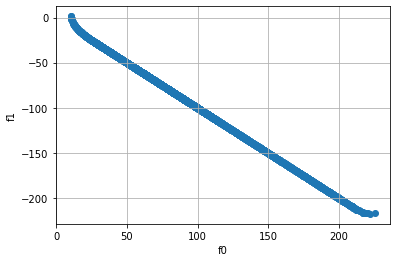

In [8]:
opt.plotfront()